In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/quora-insincere-questions-classification/train.csv
/kaggle/input/quora-insincere-questions-classification/sample_submission.csv
/kaggle/input/quora-insincere-questions-classification/test.csv
/kaggle/input/quora-insincere-questions-classification/embeddings/paragram_300_sl999/paragram_300_sl999.txt
/kaggle/input/quora-insincere-questions-classification/embeddings/paragram_300_sl999/README.txt
/kaggle/input/quora-insincere-questions-classification/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec
/kaggle/input/quora-insincere-questions-classification/embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin
/kaggle/input/quora-insincere-questions-classification/embeddings/glove.840B.300d/glove.840B.300d.txt


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import seaborn as sns
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [4]:
import spacy
from collections import Counter

In [5]:
import pickle

In [6]:
train_df = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/train.csv')
test_df = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/test.csv')

In [7]:
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [8]:
test_df.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [9]:
train_df['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [10]:
print('Average word length of questions in train is {0:.0f}.'.format(np.mean(train_df['question_text'].apply(lambda x: len(x.split())))))
print('Average word length of questions in test is {0:.0f}.'.format(np.mean(test_df['question_text'].apply(lambda x: len(x.split())))))

Average word length of questions in train is 13.
Average word length of questions in test is 13.


In [11]:
print('Max word length of questions in train is {0:.0f}.'.format(np.max(train_df['question_text'].apply(lambda x: len(x.split())))))
print('Max word length of questions in test is {0:.0f}.'.format(np.max(test_df['question_text'].apply(lambda x: len(x.split())))))

Max word length of questions in train is 134.
Max word length of questions in test is 87.


In [12]:
print('Average character length of questions in train is {0:.0f}.'.format(np.mean(train_df['question_text'].apply(lambda x: len(x)))))
print('Average character length of questions in test is {0:.0f}.'.format(np.mean(test_df['question_text'].apply(lambda x: len(x)))))

Average character length of questions in train is 71.
Average character length of questions in test is 71.


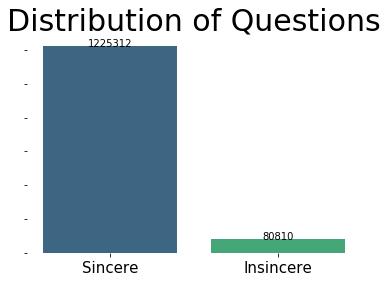

In [13]:
# using seaborns countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(train_df.target, palette='viridis')
g.set_xticklabels(['Sincere', 'Insincere'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Questions', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
fig.savefig('classes.png')
plt.show()

In [14]:
# print percentage of questions where target == 1
(len(train_df.loc[train_df.target==1])) / (len(train_df.loc[train_df.target == 0])) * 100

6.595054973753624

In [15]:
X, y = train_df['question_text'], train_df['target']

In [16]:
df1 = train_df.sample(frac =.3) 

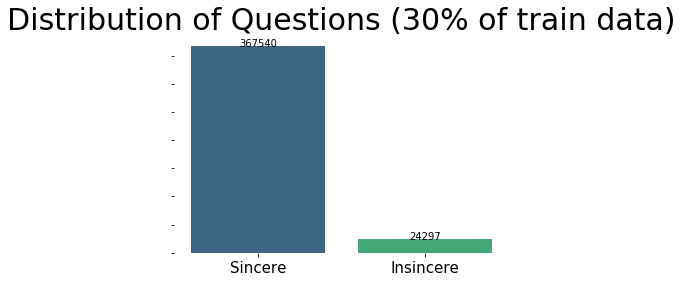

In [17]:
# using seaborns countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(df1.target, palette='viridis')
g.set_xticklabels(['Sincere', 'Insincere'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Questions (30% of train data)', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
fig.savefig('classes.png')
plt.show()

In [18]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [19]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [20]:
#Lemmatizer
class LemmaTokenizer(object):
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    return [self.wnl.lemmatize(t) for t in 
            word_tokenize(doc)]

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorizer =TfidfVectorizer(stop_words='english',tokenizer=LemmaTokenizer())

In [23]:
x = vectorizer.fit_transform(df1['question_text'])

/opt/conda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [24]:
#Minority oversampling
sm = SMOTE(random_state=42)
x,y = sm.fit_sample(x,df1['target'])

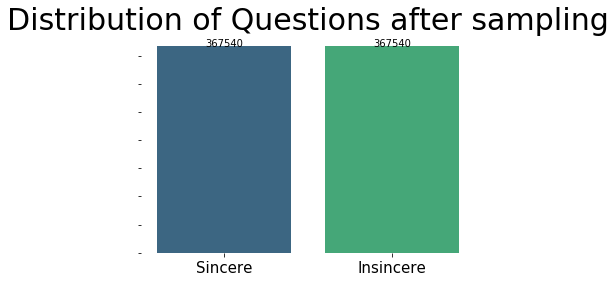

In [25]:
# using seaborns countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(y, palette='viridis')
g.set_xticklabels(['Sincere', 'Insincere'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Questions after sampling', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
fig.savefig('classes.png')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=5)

In [30]:
from sklearn.svm import LinearSVC
model = LinearSVC(random_state=42,tol=5,fit_intercept=False)
model.fit(x_train,y_train)
svcpredictions = model.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
mnbaccuracy = accuracy_score(y_test, svcpredictions)
print('Confusion Matrix:',format(confusion_matrix(y_test,svcpredictions)))
print('Accuracy score: ', format(accuracy_score(y_test, svcpredictions)))
print('Precision score: ', format(precision_score(y_test, svcpredictions)))
print('Recall score: ', format(recall_score(y_test, svcpredictions)))
print('F1 score: ', format(f1_score(y_test, svcpredictions)))

Confusion Matrix: [[83430  8343]
 [ 3346 88651]]
Accuracy score:  0.9363933177341242
Precision score:  0.9139843701672269
Recall score:  0.9636292487798516
F1 score:  0.9381504939388648


[[83430  8343]
 [ 3346 88651]]


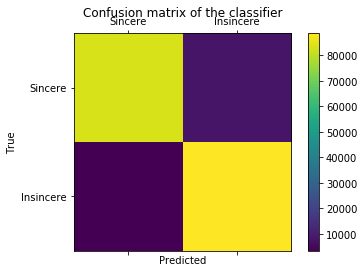

In [39]:
labels = ['Sincere', 'Insincere']
cm = confusion_matrix(y_test, svcpredictions)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
predictions = naive_bayes.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
mnbaccuracy = accuracy_score(y_test, predictions)
print('Confusion Matrix:',format(confusion_matrix(y_test,predictions)))
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Confusion Matrix: [[75833 15940]
 [ 3766 88231]]
Accuracy score:  0.8927681340806443
Precision score:  0.8469823655335939
Recall score:  0.9590638825179082
F1 score:  0.8995452877125729


[[75833 15940]
 [ 3766 88231]]


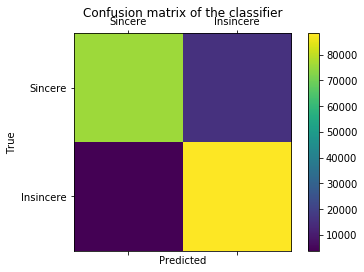

In [35]:
from sklearn.metrics import confusion_matrix

labels = ['Sincere', 'Insincere']
cm = confusion_matrix(y_test, predictions)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lrpredicted = lr.predict(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
lr_accuracy = accuracy_score(lrpredicted,y_test )
print('Confusion Matrix:',format(confusion_matrix(y_test,lrpredicted)))
print('Accuracy score: ', format(accuracy_score(lrpredicted,y_test )))
print('Precision score: ', format(precision_score(y_test,lrpredicted)))
print('Recall score: ', format(recall_score(y_test, lrpredicted)))
print('F1 score: ', format(f1_score(y_test, lrpredicted)))

Confusion Matrix: [[83457  8316]
 [ 4831 87166]]
Accuracy score:  0.9284594874027317
Precision score:  0.9129050501665236
Recall score:  0.9474874180679804
F1 score:  0.929874812645683


[[83457  8316]
 [ 4831 87166]]


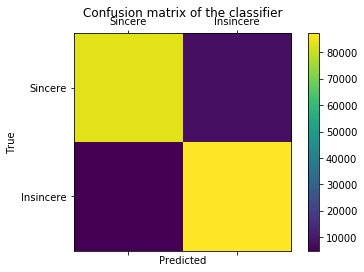

In [38]:
labels = ['Sincere', 'Insincere']
cm = confusion_matrix(y_test, lrpredicted)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()